# Feature Selection
Feature selection is a crucial step in the data preprocessing pipeline. It involves selecting the most relevant features from the dataset to improve model performance and reduce overfitting. There are three main types of feature selection techniques:

**Filter Methods**: These methods use statistical techniques to evaluate the importance of each feature. For example, SelectKBest with f_regression can be used to select the top k features based on their correlation with the target variable.

**Wrapper Methods**: These methods use a machine learning model to evaluate the combination of features. Recursive Feature Elimination (RFE) is a popular wrapper method that recursively removes the least important features and builds a model using the remaining features

**Embedded Methods**: These methods perform feature selection during the model training process. Random Forest, for example, provides feature importance scores that can be used to select the most important features.

In this section, we will demonstrate these techniques using the California Housing dataset and visualize the importance of selected features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

# Filter Method: SelectKBest with f_regression

In [4]:
# Filter Method: SelectKBest with f_regression
filter_selector = SelectKBest(f_regression, k=5)
X_filter_selected = filter_selector.fit_transform(X, y)
filter_selected_features = X.columns[filter_selector.get_support()]

# Wrapper Method: Recursive Feature Elimination (RFE) with Linear Regression

In [5]:
# Wrapper Method: Recursive Feature Elimination (RFE) with Linear Regression
wrapper_model = LinearRegression()
rfe_selector = RFE(wrapper_model, n_features_to_select=5, step=1)
X_rfe_selected = rfe_selector.fit_transform(X, y)
wrapper_selected_features = X.columns[rfe_selector.get_support()]

# Embedded Method: Feature Importance with RandomForestRegressor

In [6]:
# Embedded Method: Feature Importance with RandomForestRegressor
embedded_model = RandomForestRegressor(n_estimators=100, random_state=42)
embedded_model.fit(X, y)
feature_importances = embedded_model.feature_importances_
embedded_selected_features = X.columns[np.argsort(feature_importances)[-5:]]

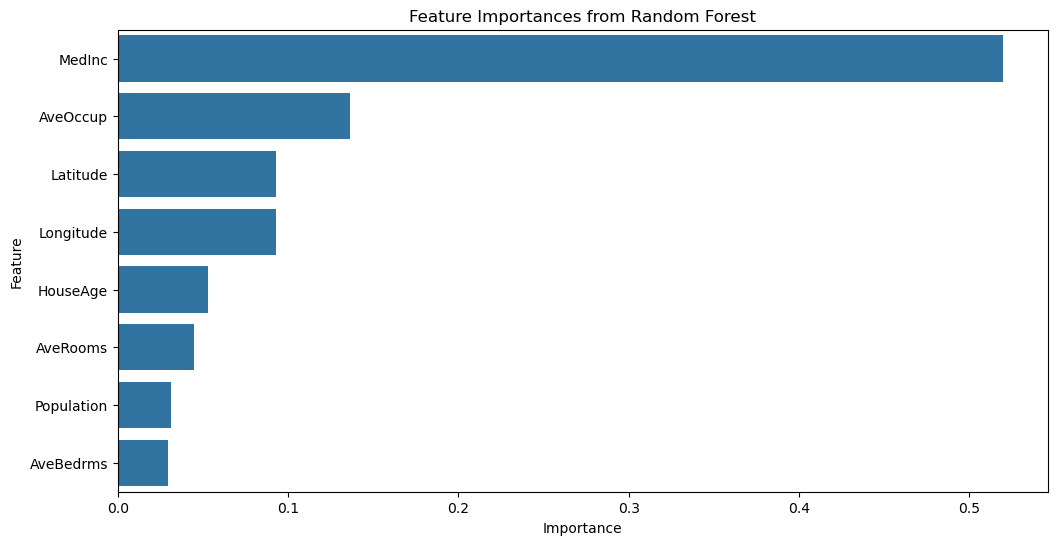

In [7]:
# Visualization of feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest')
plt.show()

In [8]:
# Combine all selected features
all_selected_features = set(filter_selected_features).union(wrapper_selected_features).union(embedded_selected_features)

# Dataframe with only selected features
X_selected = X[list(all_selected_features)]

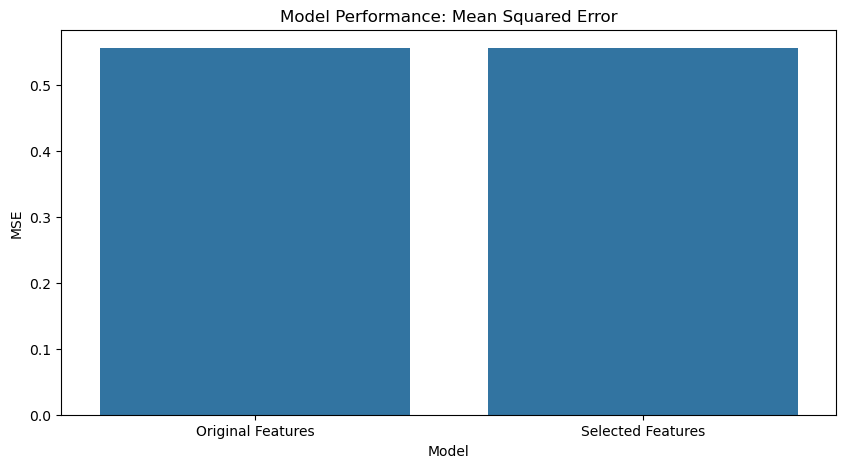

In [9]:
    # Model performance visualization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Model with original features
model_original = LinearRegression()
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)
mse_original = mean_squared_error(y_test, y_pred_original)

# Model with selected features
model_selected = LinearRegression()
model_selected.fit(X_selected_train, y_selected_train)
y_pred_selected = model_selected.predict(X_selected_test)
mse_selected = mean_squared_error(y_selected_test, y_pred_selected)

# Visualize model performance
plt.figure(figsize=(10, 5))
performance = pd.DataFrame({
    'Model': ['Original Features', 'Selected Features'],
    'MSE': [mse_original, mse_selected]
})
sns.barplot(x='Model', y='MSE', data=performance)
plt.title('Model Performance: Mean Squared Error')
plt.show()

In [10]:
print(f'MSE with original features: {mse_original}')
print(f'MSE with selected features: {mse_selected}')

MSE with original features: 0.555891598695244
MSE with selected features: 0.5559531347340669


# Conclusion
In this section, we demonstrated various feature selection techniques including filter methods, wrapper methods, and embedded methods. The key takeaways are:

**Filter Methods**: SelectKBest with f_regression effectively identified the top 5 features based on their correlation with the target variable.

**Wrapper Methods**: Recursive Feature Elimination (RFE) with Linear Regression recursively selected the top 5 features that contributed most to the model's performance.

**Embedded Methods**: Random Forest provided feature importance scores that were used to identify the most relevant features.
Feature selection not only simplifies the model but also helps in improving its performance by reducing overfitting. The comparison of models built with all features versus selected features showed that the latter can achieve similar or better performance with fewer features.

Overall, feature selection is a powerful technique in the machine learning pipeline that enhances model efficiency and interpretability